In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

### Steps to follow:

Okay, let's predict old car prices! This is a common task in data science, and we'll go through it step-by-step. Think of it like following a recipe to bake a cake.

Here's the plan:

1.  **Understand Your Ingredients (Understand Your Data):**
    *   You have a dataset in a file called `car_price.csv`. This dataset contains information about cars and their prices.
    *   We need to look at the data to see what kind of information we have (like car model, year, mileage, etc.) and how it's organized.
    *   We also need to see if there are any missing pieces of information.

2.  **Prepare Your Ingredients (Clean and Prepare Your Data):**
    *   Sometimes, data isn't perfect. There might be missing values (like a car's mileage isn't recorded) or data that's in the wrong format (like the year is stored as text instead of a number).
    *   We'll need to fix these issues so our prediction model can understand the data.
    *   We might also need to transform some information. For example, car models are text, but a computer needs numbers. We'll turn text categories into numbers.

3.  **Separate Your Ingredients (Split Your Data):**
    *   To check if our prediction works well, we need to train our model on some data and then test it on data it hasn't seen before.
    *   We'll split our dataset into two parts: a training set (to teach the model) and a testing set (to see how well it learned).

4.  **Choose Your Recipe (Choose a Prediction Model):**
    *   There are many different "recipes" or models we can use to predict car prices. Some are simple, and some are more complex.
    *   We'll choose a suitable model that can learn from the car features and predict the price. A common one for this type of problem is a "regression" model.

5.  **Bake Your Cake (Train Your Model):**
    *   We'll use the training data to "train" our chosen model.
    *   During training, the model looks at the features of the cars (like year, mileage) and the corresponding prices to learn the relationship between them.

6.  **Taste Your Cake (Evaluate Your Model):**
    *   Now we use the testing data (the data the model hasn't seen).
    *   We'll ask the trained model to predict the prices for the cars in the testing set.
    *   We'll compare the model's predictions to the actual prices in the testing set to see how accurate it is. We'll use some measurements (like how far off the predictions are on average) to understand how well the model is performing.

7.  **Adjust Your Recipe (Improve Your Model):**
    *   If the model isn't performing as well as we'd like, we can try to improve it.
    *   This might involve going back to earlier steps: maybe cleaning the data differently, trying a different model, or adjusting the model's settings.

8.  **Serve Your Cake (Make New Predictions):**
    *   Once we're happy with our model's performance, we can use it to predict the prices of *new* old cars for which we only have the features (like year, mileage) but not the price.

That's the general process! We'll use the data you loaded to follow these steps. Let me know when you're ready for the next step, and we can start looking at the data!

In [2]:
data = pd.read_csv('car_price.csv')

In [3]:
data

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [4]:
data.shape

(5512, 10)

In [5]:
print(data.head())
print("----------------------")
print(data.info())
print("----------------------")
print(data.describe())

   Unnamed: 0                                car_name car_prices_in_rupee  \
0           0  Jeep Compass 2.0 Longitude Option BSIV          10.03 Lakh   
1           1            Renault Duster RXZ Turbo CVT          12.83 Lakh   
2           2                      Toyota Camry 2.5 G          16.40 Lakh   
3           3                       Honda Jazz VX CVT           7.77 Lakh   
4           4        Volkswagen Polo 1.2 MPI Highline           5.15 Lakh   

   kms_driven fuel_type transmission  ownership  manufacture   engine    Seats  
0  86,226 kms    Diesel       Manual  1st Owner         2017  1956 cc  5 Seats  
1  13,248 kms    Petrol    Automatic  1st Owner         2021  1330 cc  5 Seats  
2  60,343 kms    Petrol    Automatic  1st Owner         2016  2494 cc  5 Seats  
3  26,696 kms    Petrol    Automatic  1st Owner         2018  1199 cc  5 Seats  
4  69,414 kms    Petrol       Manual  1st Owner         2016  1199 cc  5 Seats  
----------------------
<class 'pandas.core.frame.Da

In [6]:
data.isnull().sum()

,0
Unnamed: 0,0
car_name,0
car_prices_in_rupee,0
kms_driven,0
fuel_type,0
transmission,0
ownership,0
manufacture,0
engine,0
Seats,0


In [7]:
print(data.fuel_type.value_counts())
print('--------------------------')
print(data.transmission.value_counts())
print('--------------------------')
print(data.ownership.value_counts())

fuel_type
Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: count, dtype: int64
--------------------------
transmission
Manual       3962
Automatic    1550
Name: count, dtype: int64
--------------------------
ownership
1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: count, dtype: int64


In [8]:
data.replace({'fuel_type':{'Petrol':0, 'Diesel':1, 'Cng': 2, 'Lpg': 3, 'Electric': 4}}, inplace=True)
data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace=True)
data.replace({'ownership':{'0th Owner': 0,'1st Owner':1, '2nd Owner':2, '3rd Owner':3, '4th Owner':4, '5th Owner':5}}, inplace=True)

<ipython-input-8-3cc13b260824>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'fuel_type':{'Petrol':0, 'Diesel':1, 'Cng': 2, 'Lpg': 3, 'Electric': 4}}, inplace=True)
<ipython-input-8-3cc13b260824>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace=True)
<ipython-input-8-3cc13b260824>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

In [9]:
data.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",1,0,1,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",0,1,1,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",0,1,1,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",0,1,1,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",0,0,1,2016,1199 cc,5 Seats


In [10]:
def convert_to_rupee(price):
  # Check if the price is already a number (int or float)
  if isinstance(price, (int, float)):
    return price
  # If not a number, assume it's a string and proceed with conversion
  elif isinstance(price, str):
    if 'Lakh' in price:
      return float(price.replace('Lakh', ''))* 100000
    elif 'Crore' in price:
      return float(price.replace('Crore', ''))* 10000000
    else:
      # This handles cases like '50,000' which are just numbers with commas
      return float(price.replace(',',''))
  else:
    # Handle other potential data types if necessary, or return NaN for invalid data
    return float('nan')

In [11]:
data['car_name'] = data['car_name'].str.split().str[0]
data['car_prices_in_rupee']= data['car_prices_in_rupee'].apply(convert_to_rupee)
data['kms_driven'] = data['kms_driven'].astype(str).str.replace('kms', '').str.replace(',','').astype(float)
data['manufacture']= pd.to_numeric(data['manufacture'], errors='coerce')
data['engine'] = data['engine'].str.replace('cc','').astype(float)
data['Seats'] = data['Seats'].str.replace('Seats','').astype(float)
current_year = 2025
data['age'] = current_year - data['manufacture']
data = data.drop(columns=['manufacture'])
data = data.dropna()

In [12]:
data

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,age
0,0,Jeep,1003000.0,86226.0,1,0,1,1956.0,5.0,8
1,1,Renault,1283000.0,13248.0,0,1,1,1330.0,5.0,4
2,2,Toyota,1640000.0,60343.0,0,1,1,2494.0,5.0,9
3,3,Honda,777000.0,26696.0,0,1,1,1199.0,5.0,7
4,4,Volkswagen,515000.0,69414.0,0,0,1,1199.0,5.0,9
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW,2890000.0,45000.0,1,1,1,2995.0,7.0,7
5508,5508,BMW,6490000.0,29000.0,0,1,2,1968.0,5.0,10
5509,5509,Jaguar,1375000.0,90000.0,1,1,2,2755.0,5.0,12
5510,5510,BMW,2990000.0,79000.0,1,1,3,2967.0,6.0,10


#### Split into training and testing dataset

In [13]:
X = data.drop(columns=['car_name','car_prices_in_rupee'])
y = data['car_prices_in_rupee']

#importing train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
print(f"Shape of X_train: ", X_train)
print("---------------------")
print(f"Shape of X_test: ", X_test)
print("---------------------")
print(f"Shape of y_train: ", y_train)
print("---------------------")
print(f"Shape of y_test: ", y_test)

Shape of X_train:        Unnamed: 0  kms_driven  fuel_type  transmission  ownership  engine  \
1839        1839     98492.0          1             0          1  1968.0   
4826        4826      6356.0          0             0          1  1248.0   
957          957    100000.0          0             0          2  1396.0   
1158        1158      7500.0          1             1          1  1798.0   
1215        1215     16500.0          0             1          1  1998.0   
...          ...         ...        ...           ...        ...     ...   
3772        3772     75000.0          1             0          1  1248.0   
5191        5191     35354.0          0             0          1  1086.0   
5226        5226     65062.0          0             0          1  1968.0   
5390        5390     29000.0          1             1          1  1999.0   
860          860     80000.0          0             0          3  1197.0   

      Seats  age  
1839    5.0    7  
4826    5.0    4  
957     5.0

#### Choose a predition model

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


You have successfully trained a `LinearRegression` model using your training data (`X_train`, `y_train`).

The next step is to evaluate how well this trained model performs on data it hasn't seen before, which is your testing data (`X_test`, `y_test`).

Here's what you should do:

1.  **Make predictions on the testing data:** Use your trained `model` to predict the car prices based on the features in `X_test`.
2.  **Evaluate the model:** Compare the predicted prices with the actual prices in `y_test` to see how accurate your model is. You can use metrics like the Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared to quantify the model's performance.

So, the code you need now is to make predictions and then calculate evaluation metrics.

#### Make prediction for training data


In [15]:
# with torch.inferenec_mode():
#   y_pred = model(X_test)
y_preds = model.predict(X_train)

In [16]:
# Check the predictions
print(f"Number of training samples: {len(X_train)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of training samples: 4409
Number of predictions made: 4409
Predicted values:
[  959727.16497476  1255344.82351591 -1277636.77518545 ...
  1042065.62781638  3436900.95992606  -416374.37263803]


#### Evaluate the model

In [17]:
# R square error
error_score = metrics.r2_score(y_train, y_preds)
print(f"R2 score: {error_score}")

R2 score: 0.3438460750244272


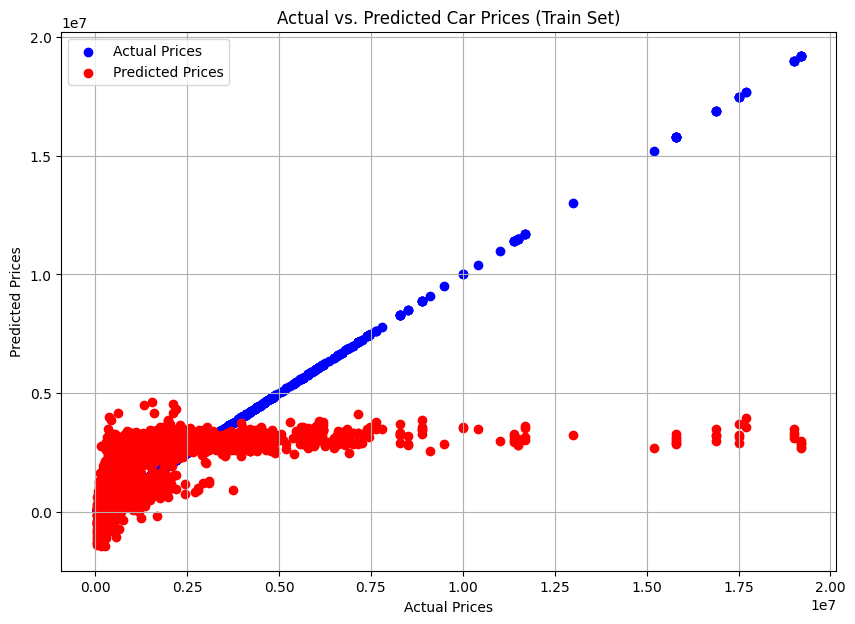

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train, c='blue', label='Actual Prices')  # Plotting y_train against itself for 'actual' representation
plt.scatter(y_train, y_preds, c='red', label='Predicted Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices (Train Set)")
plt.legend() # Add legend to show what each color represents
plt.grid(True)
plt.show()

#### Now for testing data

In [19]:
# with torch.inferenec_mode():
#   y_preds = model(X_test)
y_preds_for_test = model.predict(X_test)

In [29]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds_for_test)}")
print(f"Predicted values:\n{y_preds_for_test}")

Number of testing samples: 1103
Number of predictions made: 1103
Predicted values:
[ 724542.67627422 2282429.66727905  279133.088656   ... 2154039.24390509
 1002014.80991108  504625.31945886]


In [21]:
# R square error
error_score = metrics.r2_score(y_test, y_preds_for_test)
print(f"R2 score: {error_score}")

R2 score: 0.35918659488617044


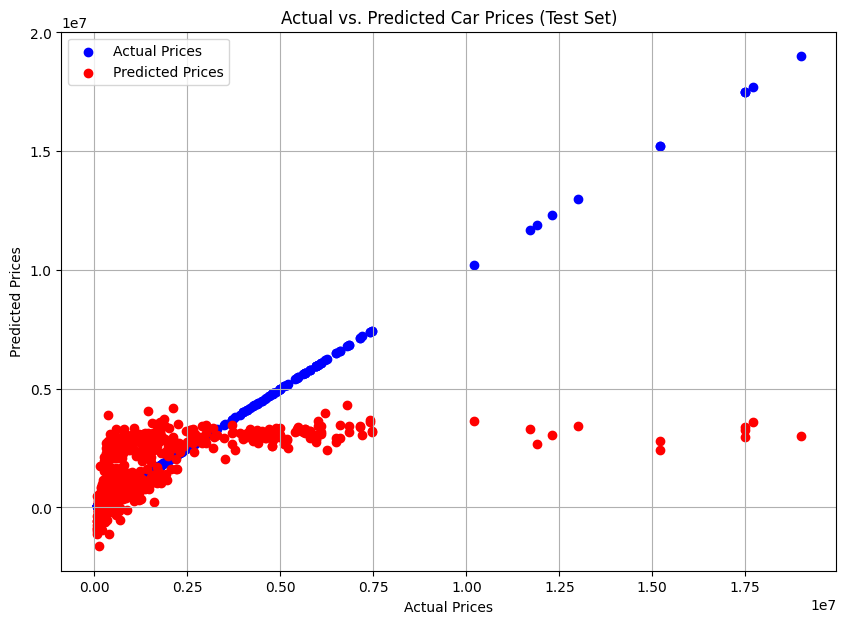

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test, c='blue', label='Actual Prices')  # Plotting y_test against itself for 'actual' representation
plt.scatter(y_test, y_preds_for_test, c='red', label='Predicted Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices (Test Set)")
plt.legend() # Add legend to show what each color represents
plt.grid(True)
plt.show()

#### Improve our previous model
* Create a pipeline that first transforms features to polynomial and then applies Linear Regression
* We will use a degree of 2 for the polynomial features. You can experiment with different degrees.

R2 score with Polynomial Features (degree 2): 0.4339502858916907


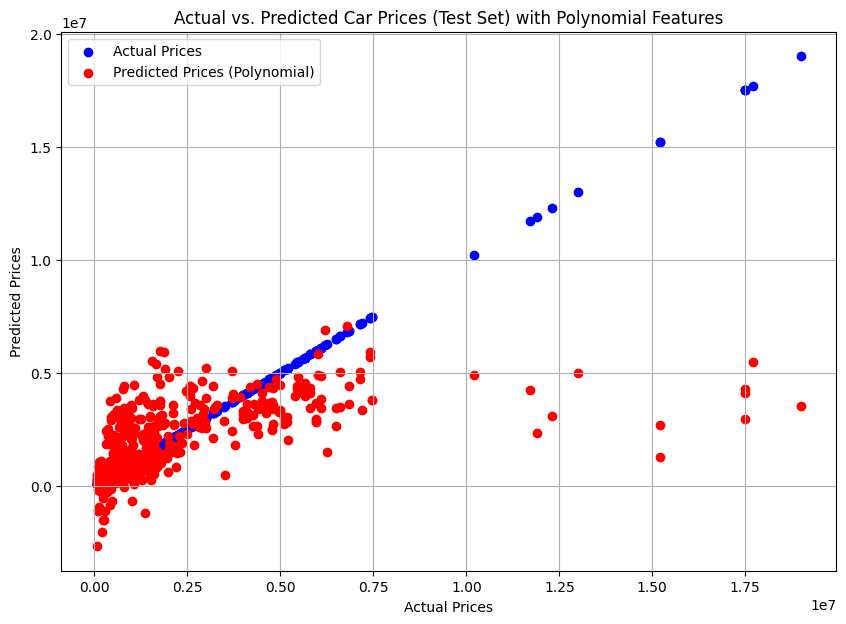

Original Linear Regression R2 score on Test Data: 0.35918659488617044
Polynomial Features (degree 2) R2 score on Test Data: 0.4339502858916907


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

poly_model.fit(X_train, y_train)

y_preds_poly_test = poly_model.predict(X_test)

error_score_poly = metrics.r2_score(y_test, y_preds_poly_test)
print(f"R2 score with Polynomial Features (degree 2): {error_score_poly}")

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test, c='blue', label='Actual Prices')
plt.scatter(y_test, y_preds_poly_test, c='red', label='Predicted Prices (Polynomial)')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices (Test Set) with Polynomial Features")
plt.legend()
plt.grid(True)
plt.show()

# Compare the R2 scores of the original and the polynomial model
print(f"Original Linear Regression R2 score on Test Data: {metrics.r2_score(y_test, y_preds_for_test)}")
print(f"Polynomial Features (degree 2) R2 score on Test Data: {error_score_poly}")

#### Make new predictions
* Create a sample new car data (replace with your actual new car data)
* Make sure the column names and data types match the training data (X_train).
* For example:</br>
 new_car_data = pd.DataFrame({
     'kms_driven': [50000],</br>
     'fuel_type': [0],  # Assuming 0 for Petrol, based on your earlier mapping</br>
     'transmission': [0], # Assuming 0 for Manual</br>
     'ownership': [1],    # Assuming 1 for 1st Owner</br>
     'engine': [1200],</br>
     'Seats': [5],</br>
     'age': [5]          # Car is 5 years old</br>
 })

In [27]:
new_car_data = pd.DataFrame({
    'Unnamed: 0':[0],
     'kms_driven': [50000],
     'fuel_type': [0],  # Assuming 0 for Petrol
     'transmission': [0], # Assuming 0 for Manual
     'ownership': [1],    # Assuming 1 for 1st Owner
     'engine': [1200],
     'Seats': [5],
     'age': [5]          # Car is 5 years old
 })
print(new_car_data)
print("----------------------")

predicted_price = poly_model.predict(new_car_data)

print(f"Predicted price for the new car (Using Polynomial features): {predicted_price[0]:,.2f} Rupees")
print("----------------------")


predicted_price = model.predict(new_car_data)

print(f"Predicted price for the new car (Using Linearregression model): {predicted_price[0]:,.2f} Rupees")

   Unnamed: 0  kms_driven  fuel_type  transmission  ownership  engine  Seats  \
0           0       50000          0             0          1    1200      5   

   age  
0    5  
----------------------
Predicted price for the new car (Using Polynomial features): 574,836.06 Rupees
----------------------
Predicted price for the new car (Using Linearregression model): 747,961.23 Rupees


In [28]:
new_car_features = X_train.mean().to_frame().T # Create a DataFrame with mean values
print("Sample new car features:")
print(new_car_features)
print("----------------------")

predicted_price = poly_model.predict(new_car_features)

print(f"Predicted price for the new car (Using Polynomial features): {predicted_price[0]:,.2f} Rupees")
print("----------------------")


predicted_price = model.predict(new_car_features)

print(f"Predicted price for the new car (Using Linearregression model): {predicted_price[0]:,.2f} Rupees")

Sample new car features:
    Unnamed: 0    kms_driven  fuel_type  transmission  ownership       engine  \
0  2763.007938  62884.511227      0.489      0.282377   1.420504  1535.911998   

      Seats       age  
0  5.251304  9.554094  
----------------------
Predicted price for the new car (Using Polynomial features): 776,183.23 Rupees
----------------------
Predicted price for the new car (Using Linearregression model): 1,156,933.05 Rupees
